# 单变量微积分
:label:`sec_single_variable_calculus`

在 :numref:`sec_calculus` 中，我们看到了微分学的基本元素。本节将更深入地探讨微积分的基础知识以及如何在机器学习的背景下理解和应用它。

## 微分学
微分学从根本上讲是研究函数在微小变化下的行为。为了理解为什么这对深度学习如此重要，让我们来看一个例子。

假设我们有一个深度神经网络，其中权重为了方便起见被连接成一个单一的向量 $\mathbf{w} = (w_1, \ldots, w_n)$。给定一个训练数据集，我们考虑该数据集上神经网络的损失，记作 $\mathcal{L}(\mathbf{w})$。

这个函数极其复杂，编码了给定架构下所有可能模型在这个数据集上的表现，因此几乎不可能确定哪一组权重 $\mathbf{w}$ 会最小化损失。因此，在实践中，我们通常从随机初始化权重开始，然后迭代地朝使损失减少最快的方向迈出小步。

那么问题变成了表面上并不更容易的事情：我们如何找到使权重尽可能快速减少的方向？要深入这个问题，让我们先考察只有一个权重的情况：对于单个实数 $x$，有 $L(\mathbf{w}) = L(x)$。

让我们取 $x$ 并尝试理解当我们将其改变一个小量到 $x + \epsilon$ 时会发生什么。如果想要具体一些，可以想象 $\epsilon = 0.0000001$ 这样的数字。为了帮助我们可视化发生的情况，让我们绘制一个示例函数 $f(x) = \sin(x^x)$ 在区间 $[0, 3]$ 上的图像。

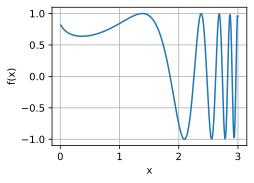

In [1]:
%matplotlib inline
import torch
from IPython import display
from d2l import torch as d2l

torch.pi = torch.acos(torch.zeros(1)).item() * 2  # Define pi in torch

# Plot a function in a normal range
x_big = torch.arange(0.01, 3.01, 0.01)
ys = torch.sin(x_big**x_big)
d2l.plot(x_big, ys, 'x', 'f(x)')

在这种大规模下，函数的行为并不简单。然而，如果我们把范围缩小到比如$[1.75,2.25]$，我们会发现图形变得简单得多。

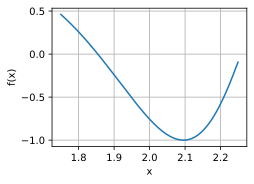

In [2]:
# Plot a the same function in a tiny range
x_med = torch.arange(1.75, 2.25, 0.001)
ys = torch.sin(x_med**x_med)
d2l.plot(x_med, ys, 'x', 'f(x)')

将这一点发挥到极致，如果我们聚焦于一个极小的段落，其行为就变得简单得多：它只是一条直线。

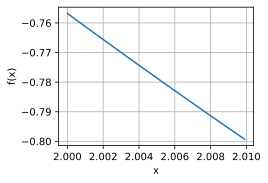

In [3]:
# Plot a the same function in a tiny range
x_small = torch.arange(2.0, 2.01, 0.0001)
ys = torch.sin(x_small**x_small)
d2l.plot(x_small, ys, 'x', 'f(x)')

这是单变量微积分的关键观察：在足够小的范围内，熟悉函数的行为可以用一条直线来模拟。这意味着对于大多数函数而言，当我们稍微改变函数的$x$值时，输出$f(x)$也会相应地稍微改变。我们唯一需要回答的问题是，“输出的变化与输入的变化相比有多大？是一半大？还是两倍大？”

因此，我们可以考虑函数输出的小变化与函数输入的小变化之间的比率。我们可以将其正式写为

$$
\frac{L(x+\epsilon) - L(x)}{(x+\epsilon) - x} = \frac{L(x+\epsilon) - L(x)}{\epsilon}.
$$

这已经足以开始在代码中进行实验了。例如，假设我们知道$L(x) = x^{2} + 1701(x-4)^3$，那么我们可以看到当$x = 4$时这个值有多大。

In [4]:
# Define our function
def L(x):
    return x**2 + 1701*(x-4)**3

# Print the difference divided by epsilon for several epsilon
for epsilon in [0.1, 0.001, 0.0001, 0.00001]:
    print(f'epsilon = {epsilon:.5f} -> {(L(4+epsilon) - L(4)) / epsilon:.5f}')

epsilon = 0.10000 -> 25.11000
epsilon = 0.00100 -> 8.00270
epsilon = 0.00010 -> 8.00012
epsilon = 0.00001 -> 8.00001


现在，如果我们仔细观察，我们会注意到这个数的输出非常接近于$8$。确实，如果我们减小$\epsilon$，我们会看到值变得越来越接近$8$。因此我们可以正确地得出结论，在$x=4$这一点上我们所寻求的值（输入变化导致输出变化的程度）应该是$8$。数学家用来表示这一事实的方式是

$$
\lim_{\epsilon \rightarrow 0}\frac{L(4+\epsilon) - L(4)}{\epsilon} = 8.
$$

稍微偏离主题一点：在神经网络研究的最初几十年里，科学家们使用这种算法（*有限差分法*）来评估损失函数在小扰动下的变化情况：只需改变权重并观察损失如何变化。这种方法计算效率低下，需要两次评估损失函数来查看单个变量的变化是如何影响损失的。如果即使是对区区几千个参数进行这样的操作，也需要在整个数据集上对网络进行数千次的评估！直到1986年，:citet:`Rumelhart.Hinton.Williams.ea.1988`中引入的*反向传播算法*才提供了一种方法，可以在与网络对整个数据集进行一次预测相同的计算时间内计算出任何权重变化对损失的影响。

回到我们的例子，这个值$8$对于不同的$x$值是不同的，因此将其定义为$x$的函数是有意义的。更正式地说，这种依赖于值的变化率被称为*导数*，写作

$$\frac{df}{dx}(x) = \lim_{\epsilon \rightarrow 0}\frac{f(x+\epsilon) - f(x)}{\epsilon}.$$
:eqlabel:`eq_der_def`

不同的文本会使用不同的符号来表示导数。例如，下面所有的记号都表示同样的意思：

$$
\frac{df}{dx} = \frac{d}{dx}f = f' = \nabla_xf = D_xf = f_x.
$$

大多数作者会选择一种记号并坚持使用它，然而即使是这样也不能保证一致性。最好熟悉所有这些记号。除非我们要对一个复杂的表达式求导，在这种情况下我们将使用$\frac{d}{dx}f$来写出像
$$
\frac{d}{dx}\left[x^4+\cos\left(\frac{x^2+1}{2x-1}\right)\right].
$$
这样的表达式，否则本文将一直使用$\frac{df}{dx}$的记号。

很多时候，直观地重新展开导数定义:eqref:`eq_der_def`来看当$x$发生微小变化时函数是如何变化的是有用的：

$$\begin{aligned} \frac{df}{dx}(x) = \lim_{\epsilon \rightarrow 0}\frac{f(x+\epsilon) - f(x)}{\epsilon} & \implies \frac{df}{dx}(x) \approx \frac{f(x+\epsilon) - f(x)}{\epsilon} \\ & \implies \epsilon \frac{df}{dx}(x) \approx f(x+\epsilon) - f(x) \\ & \implies f(x+\epsilon) \approx f(x) + \epsilon \frac{df}{dx}(x). \end{aligned}$$
:eqlabel:`eq_small_change`

最后一个等式值得特别指出。它告诉我们，如果你取任意一个函数，并对其输入做一个微小的改变，那么输出将会按照导数的比例做出相应的微小改变。

通过这种方式，我们可以把导数理解为告诉我们在输入发生变化时输出变化大小的缩放因子。

## 微积分规则
:label:`sec_derivative_table`

我们现在转向理解如何计算显式函数的导数的任务。一个完整的正式微积分处理会从第一原则推导出一切。我们在这里不会沉迷于这种诱惑，而是提供对常见规则的理解。

### 常见导数
正如在:numref:`sec_calculus`中所见，当计算导数时，通常可以使用一系列规则将计算简化到几个核心函数。为了便于参考，我们在此重复列出这些规则。

* **常数的导数。** $\frac{d}{dx}c = 0$。
* **线性函数的导数。** $\frac{d}{dx}(ax) = a$。
* **幂规则。** $\frac{d}{dx}x^n = nx^{n-1}$。
* **指数函数的导数。** $\frac{d}{dx}e^x = e^x$。
* **对数函数的导数。** $\frac{d}{dx}\log(x) = \frac{1}{x}$。

### 导数规则
如果每一个导数都需要单独计算并存储在表中，那么微分学几乎是不可能完成的任务。数学的一个恩赐是我们能够推广上述导数，并计算更复杂的导数，比如找到$f(x) = \log\left(1+(x-1)^{10}\right)$的导数。如在:numref:`sec_calculus`中提到的那样，实现这一目标的关键在于编码当我们以各种方式组合函数时会发生什么，尤其是：和、积以及复合。

* **和规则。** $\frac{d}{dx}\left(g(x) + h(x)\right) = \frac{dg}{dx}(x) + \frac{dh}{dx}(x)$。
* **乘积规则。** $\frac{d}{dx}\left(g(x)\cdot h(x)\right) = g(x)\frac{dh}{dx}(x) + \frac{dg}{dx}(x)h(x)$。
* **链式法则。** $\frac{d}{dx}g(h(x)) = \frac{dg}{dh}(h(x))\cdot \frac{dh}{dx}(x)$。

让我们看看如何使用:eqref:`eq_small_change`来理解这些规则。对于和规则，考虑以下推理链：

$$
\begin{aligned}
f(x+\epsilon) & = g(x+\epsilon) + h(x+\epsilon) \\
& \approx g(x) + \epsilon \frac{dg}{dx}(x) + h(x) + \epsilon \frac{dh}{dx}(x) \\
& = g(x) + h(x) + \epsilon\left(\frac{dg}{dx}(x) + \frac{dh}{dx}(x)\right) \\
& = f(x) + \epsilon\left(\frac{dg}{dx}(x) + \frac{dh}{dx}(x)\right).
\end{aligned}
$$

通过比较这个结果与$f(x+\epsilon) \approx f(x) + \epsilon \frac{df}{dx}(x)$的事实，我们看到$\frac{df}{dx}(x) = \frac{dg}{dx}(x) + \frac{dh}{dx}(x)$正如所愿。这里的直觉是：当我们改变输入$x$时，$g$和$h$共同通过$\frac{dg}{dx}(x)$和$\frac{dh}{dx}(x)$贡献了输出的变化。

乘积更加微妙，这需要一个新的关于如何处理这些表达式的观察。我们将像以前一样开始使用:eqref:`eq_small_change`：

$$
\begin{aligned}
f(x+\epsilon) & = g(x+\epsilon)\cdot h(x+\epsilon) \\
& \approx \left(g(x) + \epsilon \frac{dg}{dx}(x)\right)\cdot\left(h(x) + \epsilon \frac{dh}{dx}(x)\right) \\
& = g(x)\cdot h(x) + \epsilon\left(g(x)\frac{dh}{dx}(x) + \frac{dg}{dx}(x)h(x)\right) + \epsilon^2\frac{dg}{dx}(x)\frac{dh}{dx}(x) \\
& = f(x) + \epsilon\left(g(x)\frac{dh}{dx}(x) + \frac{dg}{dx}(x)h(x)\right) + \epsilon^2\frac{dg}{dx}(x)\frac{dh}{dx}(x). \\
\end{aligned}
$$

这类似于上面所做的计算，实际上我们看到了我们的答案（$\frac{df}{dx}(x) = g(x)\frac{dh}{dx}(x) + \frac{dg}{dx}(x)h(x)$）紧挨着$\epsilon$出现，但有一个$\epsilon^{2}$量级的项的问题。我们将此称为*高阶项*，因为$\epsilon^2$的幂高于$\epsilon^1$的幂。我们将在后面的章节中看到有时我们需要跟踪这些项，但是现在观察一下，如果$\epsilon = 0.0000001$，则$\epsilon^{2}= 0.0000000000001$，这是极其小的。当我们令$\epsilon \rightarrow 0$时，我们可以安全地忽略高阶项。作为本附录的一般惯例，我们将使用"$\approx$"表示两个项在高阶项上相等。然而，如果我们希望更正式一些，我们可以检查差商

$$
\frac{f(x+\epsilon) - f(x)}{\epsilon} = g(x)\frac{dh}{dx}(x) + \frac{dg}{dx}(x)h(x) + \epsilon \frac{dg}{dx}(x)\frac{dh}{dx}(x),
$$

并看到当我们令$\epsilon \rightarrow 0$时，右边的项也趋于零。

最后，对于链式法则，我们再次可以像之前那样使用:eqref:`eq_small_change`并看到

$$
\begin{aligned}
f(x+\epsilon) & = g(h(x+\epsilon)) \\
& \approx g\left(h(x) + \epsilon \frac{dh}{dx}(x)\right) \\
& \approx g(h(x)) + \epsilon \frac{dh}{dx}(x) \frac{dg}{dh}(h(x))\\
& = f(x) + \epsilon \frac{dg}{dh}(h(x))\frac{dh}{dx}(x),
\end{aligned}
$$

其中第二行我们将函数$g$视为其输入（$h(x)$）被微小量$\epsilon \frac{dh}{dx}(x)$偏移。

这些规则为我们提供了灵活的工具集来计算几乎任何所需的表达式。例如，

$$
\begin{aligned}
\frac{d}{dx}\left[\log\left(1+(x-1)^{10}\right)\right] & = \left(1+(x-1)^{10}\right)^{-1}\frac{d}{dx}\left[1+(x-1)^{10}\right]\\
& = \left(1+(x-1)^{10}\right)^{-1}\left(\frac{d}{dx}[1] + \frac{d}{dx}[(x-1)^{10}]\right) \\
& = \left(1+(x-1)^{10}\right)^{-1}\left(0 + 10(x-1)^9\frac{d}{dx}[x-1]\right) \\
& = 10\left(1+(x-1)^{10}\right)^{-1}(x-1)^9 \\
& = \frac{10(x-1)^9}{1+(x-1)^{10}}.
\end{aligned}
$$

每一步使用了以下规则：

1. 链式法则和对数的导数。
2. 和规则。
3. 常数的导数、链式法则和幂规则。
4. 和规则、线性函数的导数、常数的导数。

做完这个例子后应该清楚两点：

1. 我们可以使用和、积、常数、幂、指数和对数写下的任何函数都可以通过遵循这些规则机械地计算其导数。
2. 让人来遵循这些规则可能是乏味且容易出错的！

幸运的是，这两点一起暗示了一个前进的方向：这是一个自动化的完美候选者！事实上，稍后在本节中我们将重新讨论的反向传播正是如此。

### 线性近似
在处理导数时，经常有用几何方式解释上述近似。特别是要注意方程

$$
f(x+\epsilon) \approx f(x) + \epsilon \frac{df}{dx}(x),
$$

用一条穿过点$(x, f(x))$且斜率为$\frac{df}{dx}(x)$的直线来近似$f$的值。这样我们就说导数给出了函数$f$的线性近似，如下图所示：

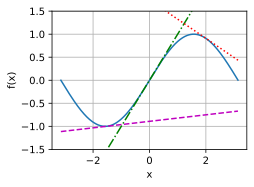

In [5]:
# Compute sin
xs = torch.arange(-torch.pi, torch.pi, 0.01)
plots = [torch.sin(xs)]

# Compute some linear approximations. Use d(sin(x))/dx = cos(x)
for x0 in [-1.5, 0.0, 2.0]:
    plots.append(torch.sin(torch.tensor(x0)) + (xs - x0) *
                 torch.cos(torch.tensor(x0)))

d2l.plot(xs, plots, 'x', 'f(x)', ylim=[-1.5, 1.5])

### 高阶导数

现在我们来做一些乍看之下可能觉得奇怪的事情。取一个函数 $f$ 并计算其导数 $\frac{df}{dx}$。这给出了 $f$ 在任意点的变化率。

然而，导数 $\frac{df}{dx}$ 本身可以被视为一个函数，因此我们可以继续计算 $\frac{df}{dx}$ 的导数以得到 $\frac{d^2f}{dx^2} = \frac{df}{dx}\left(\frac{df}{dx}\right)$。我们将这个称为 $f$ 的二阶导数。这个函数表示的是变化率的变化率，或者说变化率是如何变化的。我们可以应用导数任意多次来获得所谓的 $n$ 阶导数。为了保持符号简洁，我们将 $n$ 阶导数记为

$$
f^{(n)}(x) = \frac{d^{n}f}{dx^{n}} = \left(\frac{d}{dx}\right)^{n} f.
$$

让我们试着理解为什么这是一个有用的概念。下面，我们可视化 $f^{(2)}(x)$, $f^{(1)}(x)$ 和 $f(x)$。

首先，考虑二阶导数 $f^{(2)}(x)$ 是一个正常数的情况。这意味着一阶导数的斜率是正的。结果，一阶导数 $f^{(1)}(x)$ 可能开始时是负的，在某一点变为零，然后最终变为正的。这告诉我们原函数 $f$ 的斜率，因此，函数 $f$ 本身先减少，变平，然后再增加。换句话说，函数 $f$ 向上弯曲，并且有一个单一的最小值，如 :numref:`fig_positive-second` 所示。

![如果假设二阶导数是一个正常数，那么一阶导数在增加，这意味着函数本身有一个最小值。](../img/posSecDer.svg)
:label:`fig_positive-second`


其次，如果二阶导数是一个负常数，这意味着一阶导数在减少。这意味着一阶导数可能开始时是正的，在某一点变为零，然后最终变为负的。因此，函数 $f$ 本身先增加，变平，然后再减少。换句话说，函数 $f$ 向下弯曲，并且有一个单一的最大值，如 :numref:`fig_negative-second` 所示。

![如果假设二阶导数是一个负常数，那么一阶导数在减少，这意味着函数本身有一个最大值。](../img/negSecDer.svg)
:label:`fig_negative-second`


第三，如果二阶导数总是零，那么一阶导数将永远不会改变——它是常数！这意味着 $f$ 以固定速率增加（或减少），并且 $f$ 本身是一条直线，如 :numref:`fig_zero-second` 所示。

![如果假设二阶导数是零，那么一阶导数是常数，这意味着函数本身是一条直线。](../img/zeroSecDer.svg)
:label:`fig_zero-second`

总之，二阶导数可以被解释为描述函数 $f$ 的弯曲方式。正的二阶导数导致向上弯曲，而负的二阶导数意味着 $f$ 向下弯曲，零的二阶导数意味着 $f$ 根本不弯曲。

让我们再进一步。考虑函数 $g(x) = ax^{2}+ bx + c$。我们可以计算出

$$
\begin{aligned}
\frac{dg}{dx}(x) & = 2ax + b \\
\frac{d^2g}{dx^2}(x) & = 2a.
\end{aligned}
$$

如果我们心中有一个原始函数 $f(x)$，我们可以计算前两个导数并找到使它们与这个计算匹配的 $a, b$ 和 $c$ 的值。类似于上一节中看到的一阶导数给出的最佳线性近似，这种构造提供了最佳的二次近似。让我们对 $f(x) = \sin(x)$ 进行可视化。

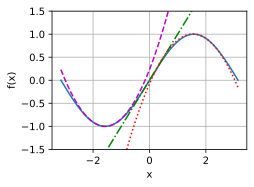

In [6]:
# Compute sin
xs = torch.arange(-torch.pi, torch.pi, 0.01)
plots = [torch.sin(xs)]

# Compute some quadratic approximations. Use d(sin(x)) / dx = cos(x)
for x0 in [-1.5, 0.0, 2.0]:
    plots.append(torch.sin(torch.tensor(x0)) + (xs - x0) *
                 torch.cos(torch.tensor(x0)) - (xs - x0)**2 *
                 torch.sin(torch.tensor(x0)) / 2)

d2l.plot(xs, plots, 'x', 'f(x)', ylim=[-1.5, 1.5])

我们将在下一节将这个想法扩展到*泰勒级数*的概念。

### 泰勒级数

*泰勒级数*提供了一种方法，如果给定了函数$f(x)$在某一点$x_0$处的前$n$阶导数值，即$\left\{ f(x_0), f^{(1)}(x_0), f^{(2)}(x_0), \ldots, f^{(n)}(x_0) \right\}$，则可以用它来近似该函数。我们的目标是找到一个$n$次多项式，在$x_0$点上与所有给定的导数相匹配。

我们在前一节看到了$n=2$的情况，通过一些代数运算可以得到：

$$
f(x) \approx \frac{1}{2}\frac{d^2f}{dx^2}(x_0)(x-x_0)^{2}+ \frac{df}{dx}(x_0)(x-x_0) + f(x_0).
$$

如上所示，分母中的$2$用来抵消对$x^2$求两次导时出现的$2$，而其他项都为零。对于一阶导数和函数值本身也适用同样的逻辑。

如果我们进一步推导到$n=3$的情况，我们会得出

$$
f(x) \approx \frac{\frac{d^3f}{dx^3}(x_0)}{6}(x-x_0)^3 + \frac{\frac{d^2f}{dx^2}(x_0)}{2}(x-x_0)^{2}+ \frac{df}{dx}(x_0)(x-x_0) + f(x_0).
$$

这里的$6 = 3 \times 2 = 3!$来自于当我们对$x^3$求三次导时前面出现的常数。


此外，我们可以通过

$$
P_n(x) = \sum_{i = 0}^{n} \frac{f^{(i)}(x_0)}{i!}(x-x_0)^{i}.
$$

得到一个$n$次多项式。

其中，

$$
f^{(n)}(x) = \frac{d^{n}f}{dx^{n}} = \left(\frac{d}{dx}\right)^{n} f.
$$

实际上，$P_n(x)$可以被视为对函数$f(x)$的最佳$n$次多项式逼近。

虽然我们不会深入探讨上述近似的误差，但值得一提的是无限极限的情况。在这种情况下，对于表现良好的函数（称为实解析函数），比如$\cos(x)$或$e^{x}$，我们可以写出无限多个项并精确地逼近相同的函数

$$
f(x) = \sum_{n = 0}^\infty \frac{f^{(n)}(x_0)}{n!}(x-x_0)^{n}.
$$

以$f(x) = e^{x}$为例。由于$e^{x}$是其自身的导数，我们知道$f^{(n)}(x) = e^{x}$。因此，可以通过取$x_0 = 0$处的泰勒级数来重建$e^{x}$，即

$$
e^{x} = \sum_{n = 0}^\infty \frac{x^{n}}{n!} = 1 + x + \frac{x^2}{2} + \frac{x^3}{6} + \cdots.
$$

让我们看看这在代码中是如何工作的，并观察增加泰勒逼近的次数如何使我们更接近所需的函数$e^x$。

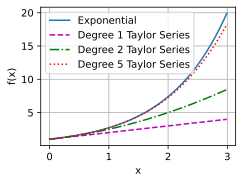

In [7]:
# Compute the exponential function
xs = torch.arange(0, 3, 0.01)
ys = torch.exp(xs)

# Compute a few Taylor series approximations
P1 = 1 + xs
P2 = 1 + xs + xs**2 / 2
P5 = 1 + xs + xs**2 / 2 + xs**3 / 6 + xs**4 / 24 + xs**5 / 120

d2l.plot(xs, [ys, P1, P2, P5], 'x', 'f(x)', legend=[
    "Exponential", "Degree 1 Taylor Series", "Degree 2 Taylor Series",
    "Degree 5 Taylor Series"])

泰勒级数有两个主要应用：

1. *理论应用*：当我们试图理解一个过于复杂的函数时，使用泰勒级数可以将其转换为可以直接处理的多项式。

2. *数值应用*：一些函数如 $e^{x}$ 或 $\cos(x)$ 对于机器来说很难计算。它们可以存储固定精度的值表（这通常也是这样做的），但这仍然留下了诸如“$\cos(1)$ 的第 1000 位数字是多少？”这样的问题。泰勒级数通常有助于回答这些问题。

## 摘要

* 导数可用于表示当我们对输入进行微小改变时函数的变化。
* 基本导数可以通过导数规则组合以创建任意复杂的导数。
* 导数可以迭代得到二阶或更高阶导数。每次增加阶数都会提供关于函数行为更精细的信息。
* 使用单个数据示例中导数的信息，我们可以通过从泰勒级数获得的多项式来近似表现良好的函数。

## 练习

1. $x^3-4x+1$ 的导数是什么？
2. $\log(\frac{1}{x})$ 的导数是什么？
3. 判断题：如果 $f'(x) = 0$ 那么 $f$ 在 $x$ 处有一个最大值或最小值？
4. $f(x) = x\log(x)$ 在 $x\ge0$ 时的最小值在哪里（我们假设 $f$ 在 $f(0)$ 处取极限值 $0$）？

[讨论](https://discuss.d2l.ai/t/1088)